<p style="background-color:purple; font-family: Arial, sans-serif; color:white; font-size:120%; text-align:center; padding: 10px; border-radius:10px;">Import needed libraries</p>


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


<p style="background-color:purple; font-family: Arial, sans-serif; color:white; font-size:120%; text-align:center; padding: 10px; border-radius:10px;">Loading data for training</p>


In [35]:
data_train_path = r"C:\Users\hagar sliem\Downloads\archive (8)\skin burn dataset\train"
data_test_path = r"C:\Users\hagar sliem\Downloads\archive (8)\skin burn dataset\test"
data_val_path = r"C:\Users\hagar sliem\Downloads\archive (8)\skin burn dataset\valid"


## **<font color = purple>Preprocessing</font>**

In [36]:
img_width = 180
img_height = 180

In [37]:
datagen = ImageDataGenerator(rescale=1./255)

In [38]:
train_generator = datagen.flow_from_directory(
    data_train_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 18822 images belonging to 3 classes.


In [39]:
print(train_generator.class_indices)

{'1st degree burn': 0, '2nd degree burn': 1, '3nd degree burn': 2}


In [40]:
test_generator = datagen.flow_from_directory(
    data_test_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 4416 images belonging to 3 classes.


<p style="background-color:purple; font-family: Arial, sans-serif; color:white; font-size:120%; text-align:center; padding: 10px; border-radius:10px;">Printing some samples</p>

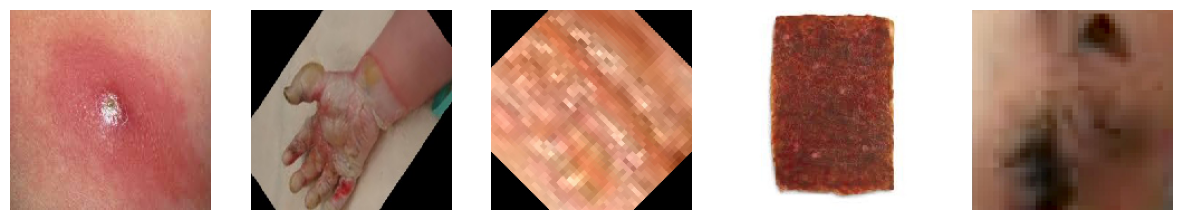

In [43]:
def display_images(images):
    plt.figure(figsize=(15, 3))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

images, _ = train_generator.next()
display_images(images)


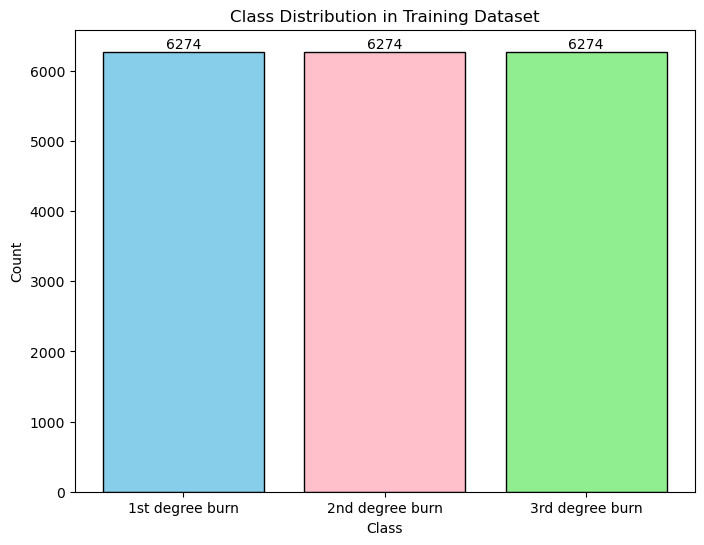

In [14]:
unique_labels, class_counts = np.unique(train_generator.classes, return_counts=True)
colors = ['skyblue', 'pink', 'lightgreen']

plt.figure(figsize=(8, 6))
bars = plt.bar(unique_labels, class_counts, color=colors, edgecolor='black')

for bar, count in zip(bars, class_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom')

plt.title('Class Distribution in Training Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(unique_labels, ['1st degree burn', '2nd degree burn', '3rd degree burn'])
plt.show()


<p style="background-color:purple; font-family: Arial, sans-serif; color:white; font-size:120%; text-align:center; padding: 10px; border-radius:10px;">Building a Model with CNN</p>


### **<font color = "purple"> Build Model </font>**

In [33]:
from tensorflow.keras.applications import ResNet50

resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in resnet_model.layers:
    layer.trainable = False
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

model = Sequential()

model.add(resnet_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(128, activation='relu'))

model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_generator,
                    epochs=5,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)])

Epoch 1/5
417/589 [====================>.........] - ETA: 3:38 - loss: 1.0228 - accuracy: 0.4596

KeyboardInterrupt: 

### **<font color = "purple">Model Compiling</font>**

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### **<font color = "purple">Model Fitting</font>**

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)
]

In [31]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/5
589/589 [==============================] - 2192s 4s/step - loss: 0.5987 - accuracy: 0.7367 - val_loss: 2.5486 - val_accuracy: 0.5202 - lr: 0.0010
Epoch 2/5
589/589 [==============================] - 5695s 10s/step - loss: 0.5644 - accuracy: 0.7503 - val_loss: 2.2395 - val_accuracy: 0.5643 - lr: 0.0010
Epoch 3/5
589/589 [==============================] - 5287s 9s/step - loss: 0.5440 - accuracy: 0.7626 - val_loss: 2.4685 - val_accuracy: 0.5897 - lr: 0.0010
Epoch 4/5
589/589 [==============================] - 2202s 4s/step - loss: 0.5139 - accuracy: 0.7746 - val_loss: 2.3069 - val_accuracy: 0.5815 - lr: 0.0010
Epoch 5/5
589/589 [==============================] - 2348s 4s/step - loss: 0.4960 - accuracy: 0.7808 - val_loss: 2.5295 - val_accuracy: 0.5697 - lr: 0.0010


In [32]:
test_loss, test_acc = model.evaluate(data_test)

print("Test Accuracy:", test_acc)
print("Test loss:", test_loss)

NameError: name 'data_test' is not defined

In [17]:
from sklearn.metrics import classification_report
y_pred = model.predict(data_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Get the true labels
y_true = data_test.classes

# Get the class labels
class_labels = list(train_generator.class_indices.keys())

# Generate classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_labels, target_names=class_labels))

56/56 [==============================] - 18s 312ms/step
Classification Report:
              precision    recall  f1-score   support

non-vehicles       0.91      0.94      0.92       897
    vehicles       0.93      0.90      0.92       879

    accuracy                           0.92      1776
   macro avg       0.92      0.92      0.92      1776
weighted avg       0.92      0.92      0.92      1776



<p style="background-color:purple; font-family: Arial, sans-serif; color:white; font-size:120%; text-align:center; padding: 10px; border-radius:10px;">Building a Model with VGG16</p>


In [19]:
from tensorflow.keras.applications import VGG16
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [20]:
for layer in vgg_model.layers:
    layer.trainable = False

### **<font color = "purple"> Build Model </font>**

In [21]:
model = Sequential([
    vgg_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid') 
])

### **<font color = "purple"> Model compile </font>**

In [22]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### **<font color = "purple"> Model Fitting </font>**

In [24]:
history = model.fit(train_generator,
                    epochs=10,
                    callbacks=[EarlyStopping(patience=3)])

Epoch 1/10
444/444 [==============================] - 1776s 4s/step - loss: 0.1747 - accuracy: 0.9829
Epoch 2/10
444/444 [==============================] - 1625s 4s/step - loss: 0.0343 - accuracy: 0.9910
Epoch 3/10
444/444 [==============================] - 1410s 3s/step - loss: 0.0319 - accuracy: 0.9934
Epoch 4/10
444/444 [==============================] - 1404s 3s/step - loss: 0.0255 - accuracy: 0.9943
Epoch 5/10
444/444 [==============================] - 1628s 4s/step - loss: 0.0239 - accuracy: 0.9947
Epoch 6/10
444/444 [==============================] - 1661s 4s/step - loss: 0.0138 - accuracy: 0.9965
Epoch 7/10
444/444 [==============================] - 1604s 4s/step - loss: 0.0133 - accuracy: 0.9972
Epoch 8/10
444/444 [==============================] - 1591s 4s/step - loss: 0.0166 - accuracy: 0.9963
Epoch 9/10
444/444 [==============================] - 1523s 3s/step - loss: 0.0088 - accuracy: 0.9974
Epoch 10/10
444/444 [==============================] - 1530s 3s/step - loss: 0.012

In [26]:
test_loss, test_acc = model.evaluate(data_test)
print("Test Accuracy:", test_acc)
print("loss Accuracy:", test_loss)

56/56 [==============================] - 154s 3s/step - loss: 0.0873 - accuracy: 0.9792
Test Accuracy: 0.9791666865348816
loss Accuracy: 0.0872715413570404


In [27]:
from sklearn.metrics import classification_report
y_pred = model.predict(data_test)
y_pred_labels = np.argmax(y_pred, axis=1)

y_true = data_test.classes

class_labels = list(train_generator.class_indices.keys())

print("Classification Report:")
print(classification_report(y_true, y_pred_labels, target_names=class_labels))

56/56 [==============================] - 154s 3s/step
Classification Report:
              precision    recall  f1-score   support

non-vehicles       0.99      0.98      0.98       897
    vehicles       0.98      0.99      0.98       879

    accuracy                           0.98      1776
   macro avg       0.98      0.98      0.98      1776
weighted avg       0.98      0.98      0.98      1776



<p style="background-color:purple; font-family: Arial, sans-serif; color:white; font-size:120%; text-align:center; padding: 10px; border-radius:10px;">ResNet50 model</p>


### **<font color = "purple"> Build Model </font>**

In [43]:
from tensorflow.keras.applications import ResNet50

resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in resnet_model.layers:
    layer.trainable = False


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

model = Sequential()

model.add(resnet_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))



### **<font color = "purple"> Model compile </font>**

In [45]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### **<font color = "purple"> Model Fitting </font>**

In [48]:
history = model.fit(train_generator,
                    epochs=5,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)])


Epoch 1/5
444/444 [==============================] - 556s 1s/step - loss: 0.0179 - accuracy: 0.9940
Epoch 2/5
444/444 [==============================] - 542s 1s/step - loss: 0.0100 - accuracy: 0.9963
Epoch 3/5
444/444 [==============================] - 505s 1s/step - loss: 0.0079 - accuracy: 0.9977
Epoch 4/5
444/444 [==============================] - 510s 1s/step - loss: 0.0070 - accuracy: 0.9973
Epoch 5/5
444/444 [==============================] - 509s 1s/step - loss: 0.0078 - accuracy: 0.9973


In [50]:
test_loss, test_acc = model.evaluate(data_test)
print("Test Accuracy:",test_acc)
print("Test Loss:",test_loss)

56/56 [==============================] - 77s 1s/step - loss: 0.1155 - accuracy: 0.9702
Test Accuracy: 0.9701576828956604
Test Loss: 0.115542471408844


In [51]:
from sklearn.metrics import classification_report
y_pred = model.predict(data_test)
y_pred_labels = np.argmax(y_pred, axis=1)

y_true = data_test.classes

class_labels = list(train_generator.class_indices.keys())

print("Classification Report:")
print(classification_report(y_true, y_pred_labels, target_names=class_labels))

56/56 [==============================] - 60s 1s/step
Classification Report:
              precision    recall  f1-score   support

non-vehicles       1.00      0.94      0.97       897
    vehicles       0.94      1.00      0.97       879

    accuracy                           0.97      1776
   macro avg       0.97      0.97      0.97      1776
weighted avg       0.97      0.97      0.97      1776



56/56 [==============================] - 59s 1s/step


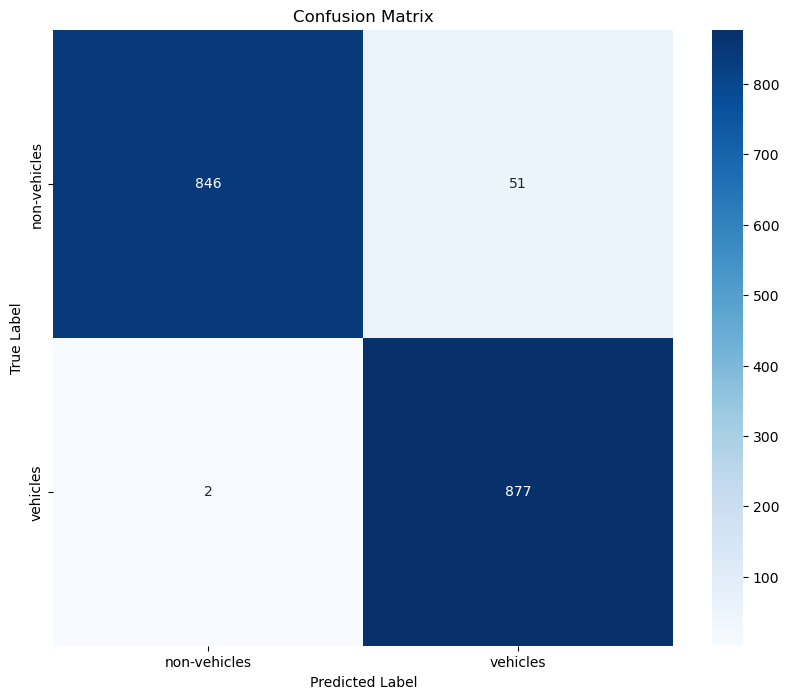

In [55]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(data_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = data_test.classes

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(data_test.class_indices.keys()), yticklabels=list(data_test.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### **<font color = "purple"> Thank youuuuuuuuuuuuuuu</font>**